#### Name: Therrin B

# PHYS 230 Lab Assignment 8

### Wednesday, February 18: Chapter 5.1-5.3
- Evaluating integrals in python 
    - Trapezoidal Rule
    - Simpson's Rule

#### Start by importing any packages you need below (feel free to update as you go):

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

## The overall goal of lab today 

Today we are going to evaluate the integral: 
$$\int_{1.1}^{10.1} \frac{\sin{x}}{\ln{x}} \,dx $$

### Step 1 (10 pts)

Write a user-defined function `f(x)` to evaluate the given **function** in the integral. Include comments in your code (and markdown cell, if necessary) explaining your process. 

In [89]:
def f(x): #defining the function
    return np.sin(x) / np.log(x)
def Int_Simpson_f(a,b, N): #defining the simpson rule of integration
    h = (b-a)/N
    Sum = f(a) + f(b)
    for k in range(1,N):
        if k%2==0:
            Sum+=2*f(a+k*h)
        else:
            Sum+=4*f(a+k*h)
    return (Sum*h/3)

def delta_simpsons_f(a,b,N): #defining our error of the simpson rule
    return abs((Int_Simpson_f(a,b,2*N)-Int_Simpson_f(a,b,N)))/15

def I_simp_adaptive(a,b,delta): #Defining an adaptive simpsons rule that doubles step size to decrease error
    err = delta + 1 #setting error to be above our accepted error
    N = 2 #initial step count
    while err>delta: #while loop that increases number of steps as long as error is larger than accepted
       err = delta_simpsons_f(a,b,N)
       N*=2
    return Int_Simpson_f(a,b,N)

print(I_simp_adaptive(1.1,10.1,0.001)) #printing

2.8492915150727534


### Applying Trapezoidal Rule (22 pts)


Write a code to do the following: 
- Create a user-defined function `trapezoidal_int(a,b,N,f)` to determine the integral using the trapezoidal rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 100$ steps
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code

In [ ]:
def trapezoidal_int(a,b,N,f): #defining the function
    h = (b-a)/N
    Sum = 1/2*f(a) + 1/2*f(b) #initializing our sum with the endpoints
    for k in range(1,N): #for loop for adding to our sum
        Sum+=f(a+k*h)
    return (Sum*h)





In [63]:
# N = 100 steps 
print(trapezoidal_int(1.1,10.1,100,f))

2.9021883624907003


In [15]:
# double steps 
print(trapezoidal_int(1.1,10.1,2*100,f))

2.8628779013854735


In [ ]:
# estimate error 
def delta_trap(a,b,N,f):
    return abs(trapezoidal_int(a,b,2*N,f) - trapezoidal_int(a,b,N,f))/3 #as seen in class
print(delta_trap(1.1,10.1,50,f))

0.04533288048176883


### Applying Simpson's Rule (22 pts)

Write a code to do the following: 
- Create a user-defined function `simpsons_int(a,b,N,f)` to determine the integral using Simpson's rule using your function defined above 

    - here: a = the lower limit of the integrand, b = upper limit, N = number of steps, and f = the function from above 
- Do so using $N = 50$ steps [note this is half of the initial steps used in trapezoidal]
- Do so again by doubling the number of steps and seeing how much the result accuracy changes by. 
- Estimate the error on the result using the equation discussed in class. 

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 

In [ ]:
# Function to integrate using Simpson's Rule 
def simpsons_int(a,b,N,f): #defining function
    h = (b-a)/N #step size
    Sum = f(a) + f(b) #initializing sum
    for k in range(1,N): #for loop to iterate over our range
        if k%2==0: #checking if our step is even
            Sum+=2*f(a+k*h)
        else: #Or our step is odd
            Sum+=4*f(a+k*h)
    return (Sum*h/3)


In [18]:
#N = 50 steps 
print(simpsons_int(1.1,10.1,50,f))

2.9012217056816034


In [19]:
# double steps 
print(simpsons_int(1.1,10.1,2*50,f))

2.8568554820089287


In [ ]:
# error 
def delta_simpsons(a,b,N,f):
    return abs((simpsons_int(a,b,2*N,f)-simpsons_int(a,b,N,f)))/15 #as seen in class
print(delta_simpsons(1.1,10.1,50,f))

0.002957748244844982


### Evaluating error and number of steps (20 pts)

In a markdown cell, discuss your results from the two different methods above. In particular, focus on the following: 
- Each method uses a different number of steps, which also means different amounts of time. How do their error estimates compare? 
- Comment on the estimated error for each compared to the direct computation of error (the difference between your value and the true value of 2.84895)
- Does the number of steps in each calculation seem appropriate? To determine this, think about what what accuracy is desired in this calculation and compare it with the measured errors. Let's say that we want to calculate the integrand to a target accuracy of 0.003
    - comment on the two different techniques with regard to this result
    - if either of the results don't meet the desired accuracy, determine how many steps are necessary to do so using the appropriate equation for doubling the number of steps (see section 5.3 in the book). For example, for Trapezoidal rule: 
    $$ I_i = \frac{1}{2}I_{i-1} + h_i\sum_{k=1 (k \text{ odd})}^{N_i-1} f(a+kh_i)$$


In general, the Simpson rule has used less number of steps to achieve the same level of error as the Trapezoidal rule. 

In [ ]:
def I_trap_adaptive(a,b,delta,f): #As previously explained, but now for a general function, also see below for more explanation
    err = delta + 1
    N = 2
    idx = 0
    while err > delta:
        err = abs(trapezoidal_int(a,b,2*N,f) - trapezoidal_int(a,b,N,f))/3
        N*=2
        idx+=1
    return (trapezoidal_int(a,b,2*N,f),idx) #returning as a tuplet to be able to call specific id for how many iterations

def I_simp_adaptive(a,b,delta,f):
    err = delta + 1 #setting error to be above our accepted error
    N = 2 #initial step count
    idx = 0
    while err > delta: #while loop that increases number of steps as long as error is larger than accepted
       err = delta_simpsons(a,b,N,f)
       N*=2
       idx+=1
    return (simpsons_int(a,b,2*N,f),idx)

trap_int = I_trap_adaptive(1.1,10.1,0.003,f)[0] #result
trap_idx = I_trap_adaptive(1.1,10.1,0.003,f)[1] #iteration count

simp_int = I_simp_adaptive(1.1,10.1,0.003,f)[0]
simp_idx = I_simp_adaptive(1.1,10.1,0.003,f)[1]

print("Trapezoidal Method:",abs(trap_int-2.84895), "error after", trap_idx, "iterations.") #Printing results
print("Simpson's Rule:", abs(simp_int-2.84895), "error after", simp_idx, "iterations.")
print("Trapezoidal Method divided by the Simpson's Rule:", abs(trap_int-2.84895)/abs(simp_int-2.84895))

Trapezoidal Method: 0.0005407475007732643 error after 8 iterations.
Simpson's Rule: 0.00034151507275348436 error after 6 iterations.
Trapezoidal Method divided by the Simpson's Rule: 1.5833781402778428


As seen above, the Simpson's rule takes 2 less iterations to achieve the desired error, noticeably the Simpson's method also has less error (being 63% of the error given by the Trapezoidal method).

### Integrating Data (22 pts)

In GitHub, you will find a file called `forces.txt`, which contins two columns of numbers. The first column reprsents the distance $x$ in meters and the second is the force $F$ along the x-direction in Newtons on the particle. We want to determine the work done on the particle, by doing the following: 

- read in the data
- use the trapezoidal rule to calculate the approximate work done on the particle in the $x$-direction. 
- plot the original force vs. distance data 
- plot the total work as a function of distance on the same graph - what is the work done? 
    - does this look familiar? 

Remember that: 

$$ W = \int_a^b F(x) \,d x $$

When your program is complete, add a markdown cell below it to explain your process and program. Don't forget to comment in your code. 


1.2691430000000001 Joules


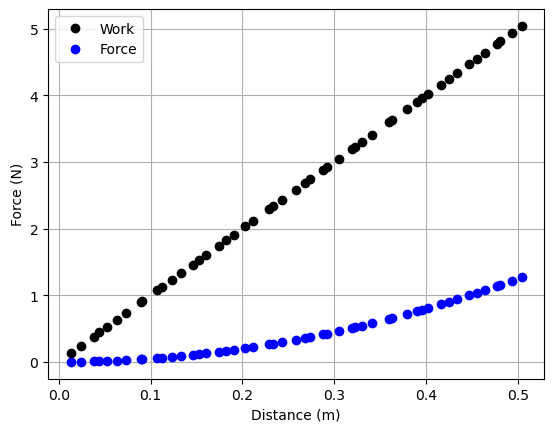

In [109]:
Force_data = np.loadtxt("forces.txt") #Load in the data

Sum = 0 #Start the sum at 0
W = [0] #Work starts at 0, which is necessary for our indexing later
for i in range(0,len(Force_data[:,0])-1): #for loop, indexed by our data
    h = abs(Force_data[i,0] - Force_data[i+1,0]) #width/height of our current riemann sum step
    Sum += h/2 * (Force_data[i,1] + Force_data[i+1,1]) #Area of our current riemann sum step
    W.append(Sum)
    
print(Sum, "Joules")

#Just plotting stuff
plt.plot(Force_data[:,0],Force_data[:,1], "ko")
plt.plot(Force_data[:,0],W, "bo")
plt.xlabel("Distance (m)")
plt.ylabel("Force (N)")
plt.legend(("Work","Force"))
plt.grid()
plt.show()

Beyond the commenting in my code, essentially what I did was load the txt file as data to the code, before using the code to iteratively find it's integral. I then graph the data and the computed integral.